# Discuss about the curse of dimensionality

## Introduction

The Curse of Dimensionality refers to problems that arise when working with data in high-dimensional spaces. *Figure 1* illustrates this problem in case of the incremental number of dimension:

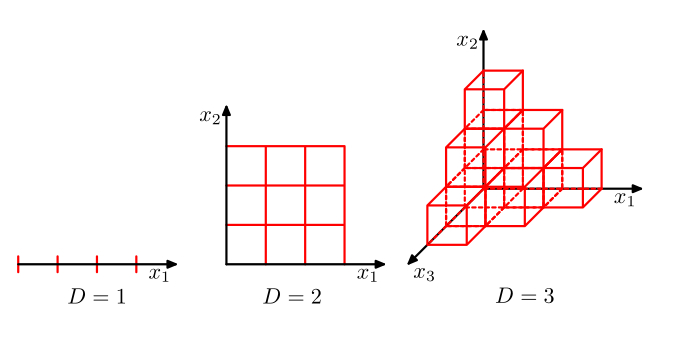

*Figure 1: Illustration of the curse of dimensionality, showing how the number of regions of a regular grid grows exponentially with the dimensionality $D$ of the space. For clarity, only a subset of the cubical regions are shown for $D = 3$*

Particularly, as the number of dimensions $D$ increases, the space becomes exponentially larger. Imagine dividing the space into small cells, where each cell could contain some data points. In a one-dimensional space ($D=1$), dividing it into cells is straightforward, like cutting a line into segments. In two dimensions ($D=2$), it's like dividing a plane into squares. But as the number of dimensions increases, the number of cells increases exponentially. For example, if you have $10$ divisions per dimension, a 1D space has $10$ cells, a 2D space has $100$ cells, and a 3D space has $1000$ cells.

Now, if the data is sparse (spread out) in these cells, many cells might not contain any data at all, or contain only a few data points. This creates a major problem for machine learning models because they rely on having enough data in each region of the space to make accurate predictions. When the data is spread too thin across many dimensions, the models struggle to generalize well because they don't have enough data in each part of the space to learn meaningful patterns. For example, in a 10-dimensional space, data points are scattered throughout a vast volume, making it unlikely that any two points are close to each other. This sparsity weakens the reliability of nearest-neighbor approaches and increases the risk of overfitting as models struggle to generalize from few, isolated samples.

This sparsity is the core of the Curse of Dimensionality, making it harder for machine learning models to work effectively as dimensions increase.

We will practice the following example with noting that the volume of a sphere of radius $r$ in $D$ dimensions must scale as $r^D$, and so we write $V_D(r) = K_D r^D$ where $K_D$ is a constant that depends on the dimension $D$. Thus the fraction of the volume of the sphere that lies between radius $r = 1 - \epsilon$ and $r = 1$ based on relative error as follows:

$$\frac{V_D(1) - V_D(1 - \epsilon)}{V_D(1)} = 1 - (1 - \epsilon)^D$$

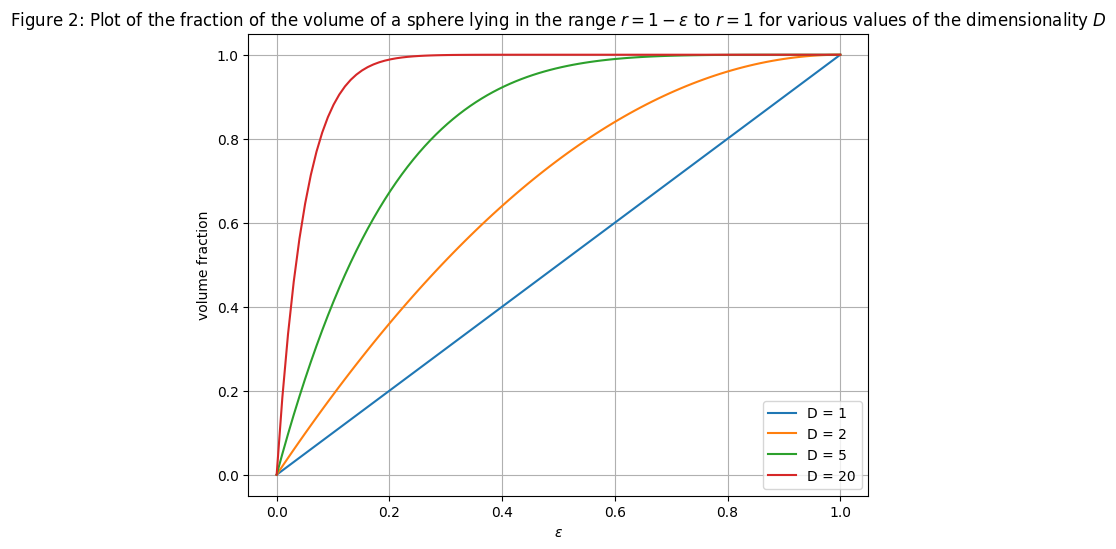

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Values for epsilon and dimensionality D
epsilon = np.linspace(0, 1, 100)
D_values = [1, 2, 5, 20]

# Function to calculate the volume fraction
def volume_fraction(epsilon, D):
    return 1 - (1 - epsilon)**D

# Plotting the figure
plt.figure(figsize=(8,6))

for D in D_values:
    plt.plot(epsilon, volume_fraction(epsilon, D), label=f'D = {D}')

plt.xlabel(r'$\epsilon$')
plt.ylabel('volume fraction')
plt.title(r'Figure 2: Plot of the fraction of the volume of a sphere lying in the range $r = 1-\epsilon$ to $r = 1$ for various values of the dimensionality $D$')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

We can see that, in *Figure 2*, the dimension $D$ increases, most of the volume of the sphere is located near the surface. This suggests that the data in high-dimensional space is not uniformly distributed, but rather concentrated at the edges of the space, which reduces the significance of distance measures such as Euclidean distance. As data points become sparse in large spaces, it becomes more difficult to identify patterns or groups in the data. Many machine learning algorithms rely on distance metrics (like Euclidean distance) that lose effectiveness in high-dimensional spaces. In low-dimensional spaces, distance measures are meaningful, but in high dimensions, all points can become almost equidistant from each other, reducing the effectiveness of algorithms that depend on nearest-neighbor calculations.

With each additional dimension, the complexity of fitting models increases. Polynomial models, for example, require an increasing number of coefficients, and capturing interactions between features demands even more data, making models computationally intensive and harder to train effectively.

## Impact on Machine Learning Models

### Reduced Model Performance and Generalization

In a classification task using the k-Nearest Neighbors (k-NN) algorithm, the Euclidean distance metric becomes less meaningful in high-dimensional spaces, as most points are equidistant from each other. This undermines the effectiveness of k-NN, resulting in incorrect or inconsistent predictions.

### Difficulty in Finding Meaningful Patterns

Regression algorithms, like Linear or Polynomial Regression, require substantial data to capture relationships among input features in high-dimensional spaces. Without enough data, models are prone to noise, learning incorrect relationships that don’t represent the true underlying patterns.

### Increased Computational Complexity

The number of parameters a model needs to learn grows rapidly as dimensionality increases, leading to higher computational complexity, memory requirements, and slower training and prediction times. For instance, a model operating in a 1000-dimensional space requires considerably more computational power and time than one in a 10-dimensional space.

### Increased Risk of Overfitting

The curse of dimensionality increases the likelihood of overfitting because, in high-dimensional spaces, models can easily find boundaries or relationships to classify training data with high accuracy. However, these boundaries may not reflect the true data structure, leading to errors on new data. For instance, in an image classification task with thousands of dimensions (pixels), a neural network might learn features specific to each training image rather than general features of the image class.

### Challenges with Distance Metrics

Many machine learning algorithms, such as k-NN, SVM, and clustering methods, rely on distance metrics. In high-dimensional spaces, however, distances between points become almost uniform, rendering distance metrics ineffective. For clustering tasks, the curse of dimensionality makes identifying clusters more challenging. Algorithms like k-means may lose effectiveness as data points become equidistant from each other, making cluster centroids less representative of any particular group of points.

# Apply Dimensionality Reduction Techniques

## Data Loading and Preprocessing

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) =  tf.keras.datasets.fashion_mnist.load_data()

2024-10-29 21:20:21.641843: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-29 21:20:21.741202: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-29 21:20:21.825827: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1730211621.901248    5714 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1730211621.923852    5714 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-29 21:20:22.101554: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [69]:
print(f"Train set shape: {X_train.shape, y_train.shape}\nTest set shape: {X_test.shape, y_test.shape}")

Train set shape: ((60000, 28, 28), (60000,))
Test set shape: ((10000, 28, 28), (10000,))


In [10]:
X_train: np.ndarray = X_train.reshape(X_train.shape[0], 784)
X_test: np.ndarray = X_test.reshape(X_test.shape[0], 784)

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

## Visualizing the mean representation of each class

This visualization highlights the typical (mean) look of each class, showing both highly representative (closest) and diverse (furthest) examples within each category. The mean images provide a clear, generalized view of each class, while the closest samples align closely with these averages, representing typical features. The furthest samples reveal intra-class diversity, showing variations that deviate significantly from the mean. This analysis indicates that PCA could reduce dimensionality effectively by capturing core class differences, even with noticeable variations within each class.

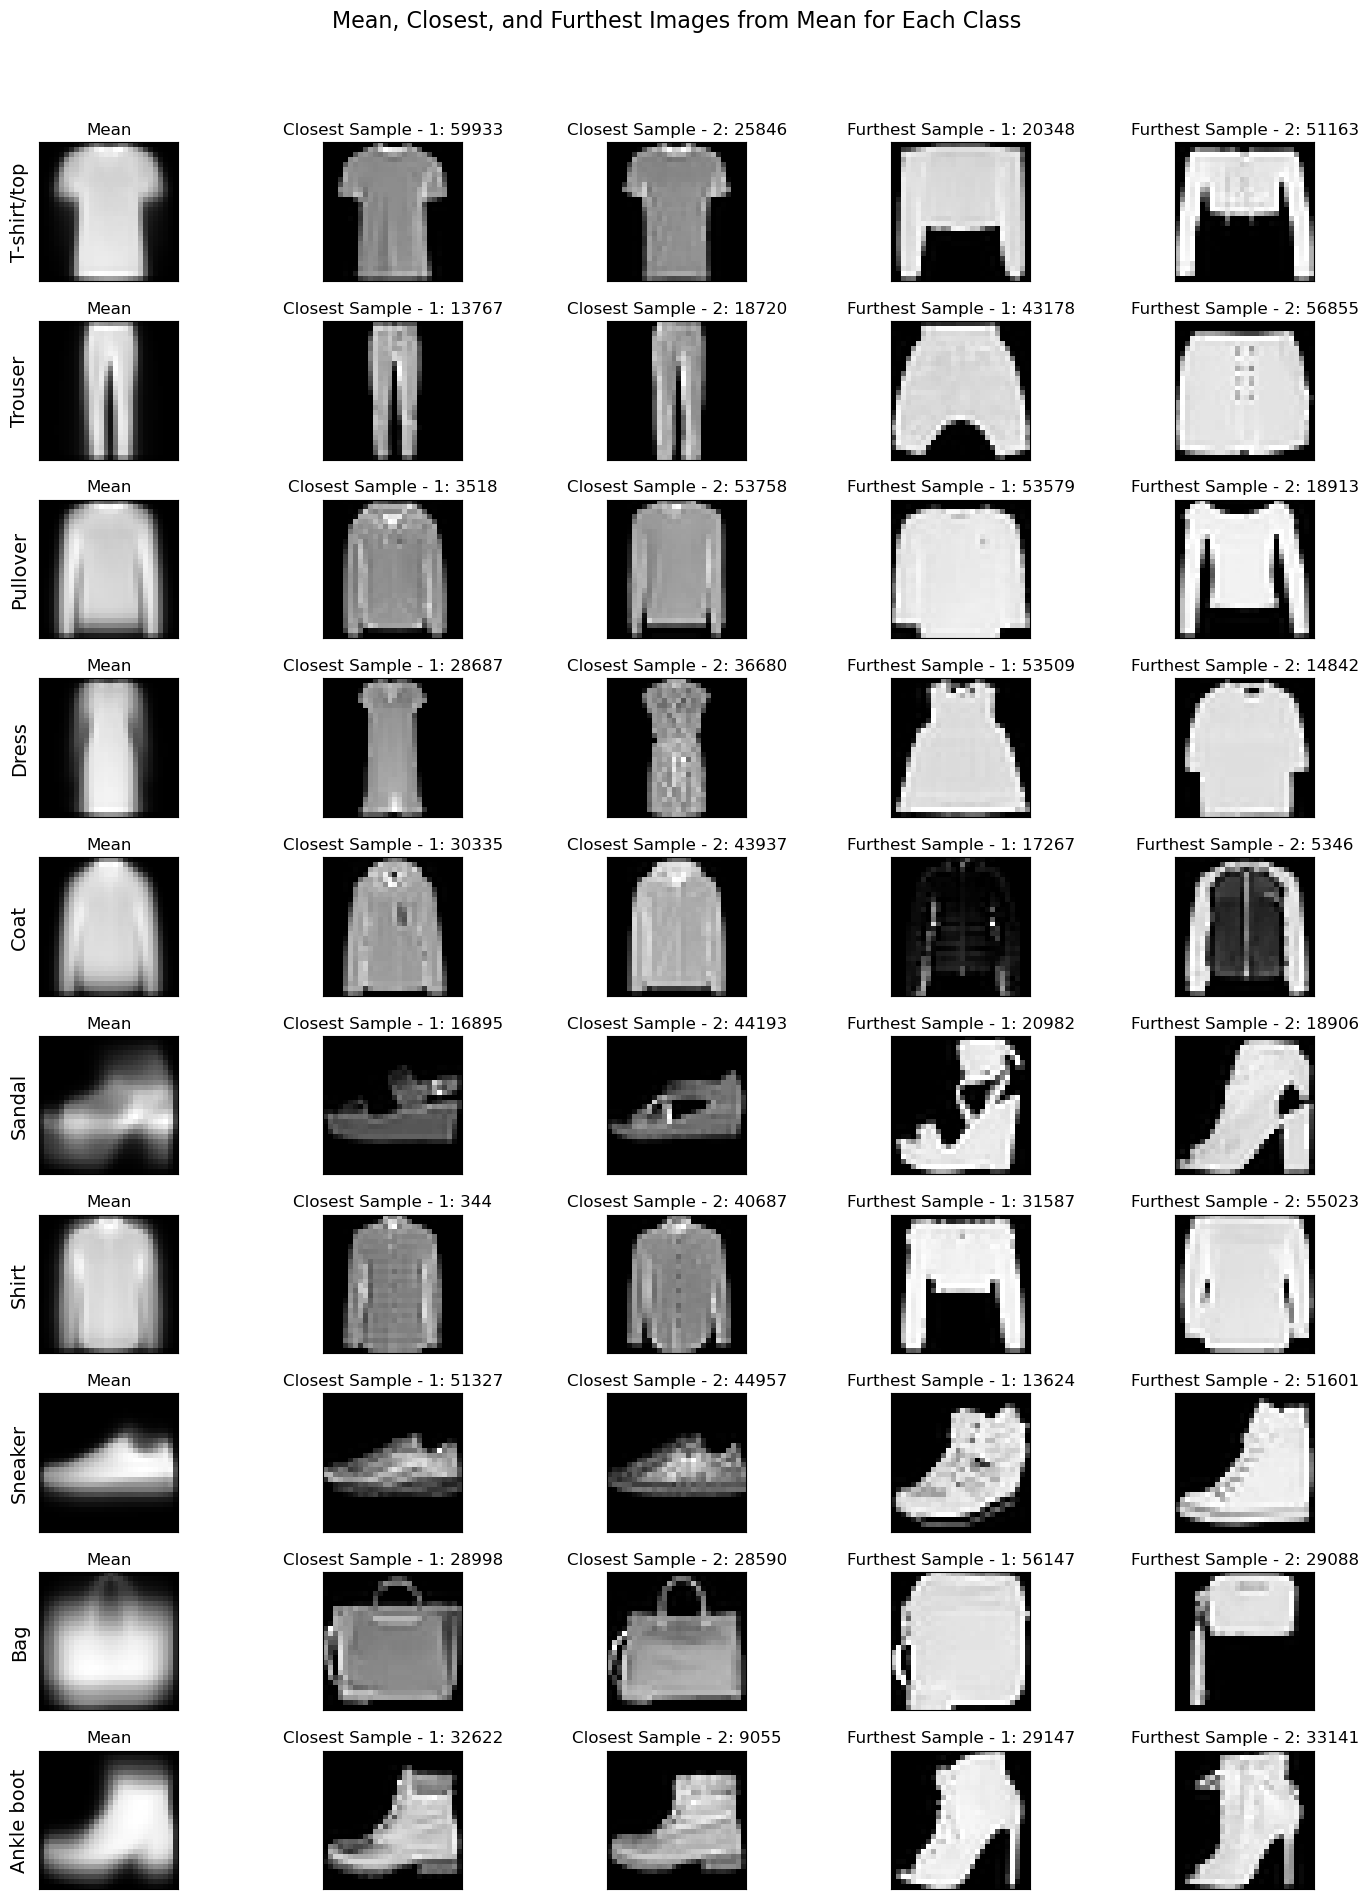

In [25]:
from scipy.spatial import distance

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

fig, axes = plt.subplots(10, 5, figsize=(15, 20))
fig.suptitle('Mean, Closest, and Furthest Images from Mean for Each Class', fontsize=16)

for i, label in enumerate(np.unique(y_train)):
    class_images = X_train[y_train == label]
    mean_image = class_images.mean(axis=0)
    
    # Compute distances from each image in the class to the mean
    distances = np.array([distance.euclidean(mean_image, img) for img in class_images])
    
    # Get indices for the closest and furthest images
    closest_indices = distances.argsort()[:2]
    furthest_indices = distances.argsort()[-2:]
    
    # Plot mean image
    axes[i, 0].imshow(mean_image.reshape(28, 28), cmap='gray')
    axes[i, 0].set_title("Mean")
    axes[i, 0].set_xticks([])
    axes[i, 0].set_yticks([])
    axes[i, 0].set_ylabel(class_names[label], fontsize=14)
    
    # Plot the closest images with sample IDs
    for j, idx in enumerate(closest_indices):
        axes[i, j+1].imshow(class_images[idx].reshape(28, 28), cmap='gray')
        axes[i, j+1].set_title(f"Closest Sample - {j+1}: {np.where(y_train == label)[0][idx]}")
        axes[i, j+1].set_xticks([])
        axes[i, j+1].set_yticks([])
    
    # Plot the furthest images with sample IDs
    for j, idx in enumerate(furthest_indices):
        axes[i, j+3].imshow(class_images[idx].reshape(28, 28), cmap='gray')
        axes[i, j+3].set_title(f"Furthest Sample - {j+1}: {np.where(y_train == label)[0][idx]}")
        axes[i, j+3].set_xticks([])
        axes[i, j+3].set_yticks([])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Applying PCA for Dimensionality Reduction

Now, we will apply PCA to reduce the dimensionality of the data and get quick insights into the explained variance ratio. We will visualize the cumulative explained variance to determine the number of principal components needed to capture most of the data variance.

In [6]:
from sklearn.decomposition import PCA

X_train_scaled_copy = X_train_scaled.copy()

# Fit PCA
pca = PCA()
pca.fit(X_train_scaled_copy)

print(f"First 10 PCs: {pca.explained_variance_[:10]}")

First 10 PCs: [173.13789644 113.01260323  42.81633652  39.89596074  31.79084015
  23.67336435  21.54106703  18.13934684  13.27049633  10.33363286]


In [7]:
print(f"Explained variance ratio of first 10 PCs: {pca.explained_variance_ratio_[:10]}")

Explained variance ratio of first 10 PCs: [0.22083547 0.14414633 0.05461176 0.05088686 0.04054887 0.03019511
 0.02747539 0.02313654 0.01692637 0.01318043]


### How to choose the number of dimensions $K$ of the new data

One way to determine $K$ is based on the amount of information that we want to retain. Theoretically, PCA is also known as the maximum retained variance method. So we can consider the sum of the retained variances as the amount of information retained. The larger the variance, the more dispersed the data is, and the larger the amount of information it represents.

Recall that in every coordinate system, the total variance of the data is the same and equals the sum of the eigenvalues ​​of the covariance matrix $\sum_{i=1}^D \lambda_i$. Furthermore, PCA helps to retain the amount of information (total variance) as: $\sum_{i=1}^K \lambda_i$. Therefore, we can consider the expression:

$$r_K = \frac{\sum_{i=1}^K \lambda_i}{\sum_{j=1}^D \lambda_j}$$

So, let's say we want to keep 99% of the data, we just need to choose $K$ as the smallest natural number such that $r_K \geq 0.99$.

In [11]:
# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the smallest K such that cumulative variance >= 0.99
K = np.argmax(cumulative_variance >= 0.99) + 1

print(f"Number of dimensions K to retain 99% of the variance: {K}")

Number of dimensions K to retain 99% of the variance: 527


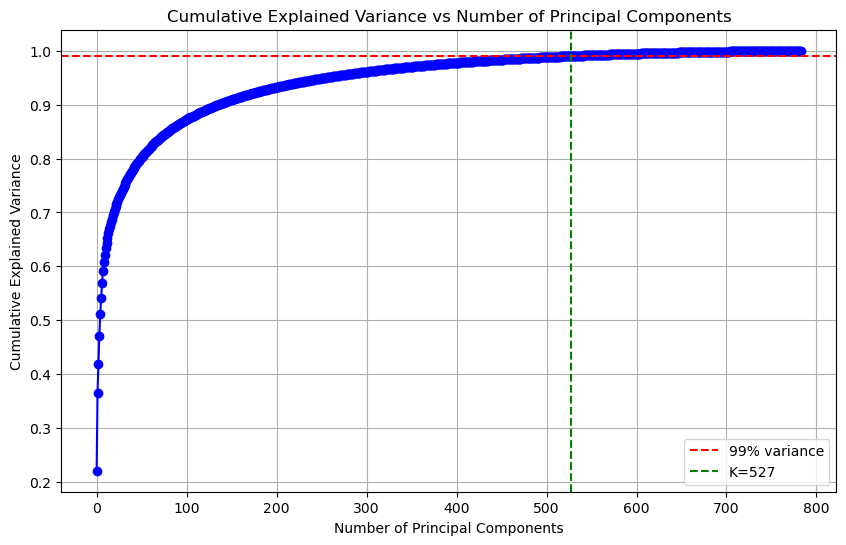

In [12]:
# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o', linestyle='-', color='b')
plt.axhline(y=0.99, color='r', linestyle='--', label='99% variance')
plt.axvline(x=K, color='g', linestyle='--', label=f'K={K}')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs Number of Principal Components')
plt.legend()
plt.grid(True)
plt.show()

Because the data retained $99 \%$ of the information has $K$ value too large that can negatively affect the model's performance. Therefore, we can choose $K$ as the smallest natural number such that $r_K \in [0.8, 0.9]$. Eventually, I think that we should experiment with $K$ value being $100$ to see how the model performs.

In [34]:
print(f"Cumulative explained variance at K=100: {cumulative_variance[99]}")

Cumulative explained variance at K=100: 0.8715402148875269


In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=100)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Train set shape after PCA: {X_train_pca.shape}\nTest set shape after PCA: {X_test_pca.shape}")

Train set shape after PCA: (60000, 100)
Test set shape after PCA: (10000, 100)


In [8]:
# Save the data
np.save('X_train_pca.npy', X_train_pca)
np.save('X_test_pca.npy', X_test_pca)
np.save('y_train.npy', y_train)
np.save('y_test.npy', y_test)

## Visualizing the reduced dimensionality data

We will visualize the first 18 principal components to observe the data distribution in a lower-dimensional space. This visualization helps us understand how well the reduced data captures the original data structure and class separability.

(784, 100)


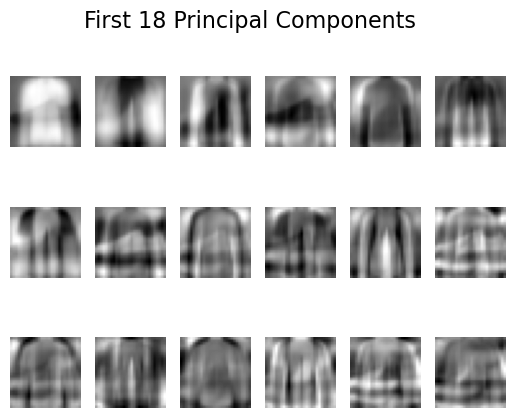

In [19]:
U_K = pca.components_.T # U_K is a matrix whose columns are the eigenvectors
print(U_K.shape)

plt.suptitle('First 18 Principal Components', fontsize=16)
for row in range(18):
    plt.subplot(3, 6, row + 1)
    plt.axis('off')
    plt.imshow(U_K[:, row].reshape(28, 28), cmap='gray')

The first 18 principal components capture key patterns of variation, highlighting common contours and structural features in the dataset. Early components show prominent edges and shapes, representing the most significant differences across images. This suggests that a reduced number of components can effectively retain essential information for classification while reducing complexity.

After dimensionality reduction, the training set takes up much less space. For example, after applying PCA to the Fashion-MNIST dataset while preserving $\approx 87 \%$ of its variance, we are left with $100$ features, instead of the original $784$ features. So the dataset is now less than $\approx 12.76 \%$ of its original size, and we only lost $\approx 13 \%$  of its variance.

It is also possible to decompress the reduced dataset back to $784$ dimensions by applying the inverse transformation of the PCA projection. This won't give us back the original data, since the projection lost a bit of information (within the $13 \%$ variance that was dropped), but it will likely be close to the original data.

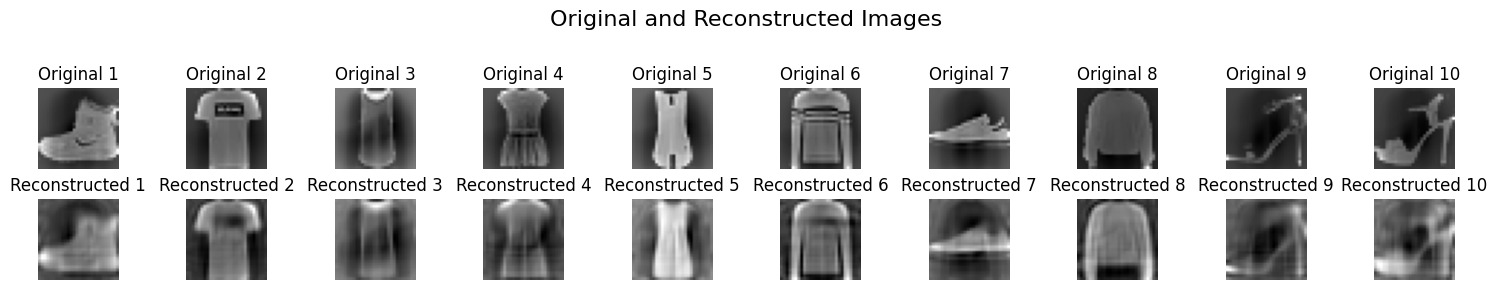

In [14]:
# Reconstruct the images
X_train_reconstructed = pca.inverse_transform(X_train_pca)
X_test_reconstructed = pca.inverse_transform(X_test_pca)

fig, axes = plt.subplots(2, 10, figsize=(15, 3))
fig.suptitle('Original and Reconstructed Images', fontsize=16)

for i in range(10):
    axes[0, i].imshow(X_train_scaled[i].reshape(28, 28), cmap='gray')
    axes[0, i].set_title(f"Original {i+1}")
    axes[0, i].axis('off')
    
    axes[1, i].imshow(X_train_reconstructed[i].reshape(28, 28), cmap='gray')
    axes[1, i].set_title(f"Reconstructed {i+1}")
    axes[1, i].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Retrain the Model

In this section, we will retrain the model using the reduced dimensionality data and evaluate its performance on the test set. We will compare the model's performance before and after dimensionality reduction to assess the impact of PCA on classification accuracy in the next section [Compare the performance of the models for the original and reduced dimensionality data](#compare-the-performance-of-the-models-for-the-original-and-reduced-dimensionality-data)

## Logistic Regression

### Experimenting in the Data 

In [7]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, log_loss

X_train_pca = np.load('X_train_pca.npy')
X_test_pca = np.load('X_test_pca.npy')
y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')

log_reg = LogisticRegression(max_iter=10000)
    
kf = KFold(n_splits=3, shuffle=True, random_state=42)

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for fold, (train_index, val_index) in enumerate(kf.split(X_train_pca)):
    print(f"Fold {fold + 1}")
    
    X_train_fold, X_val_fold = X_train_pca[train_index], X_train_pca[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    log_reg.fit(X_train_fold, y_train_fold)
    
    y_train_pred = log_reg.predict(X_train_fold)
    y_val_pred = log_reg.predict(X_val_fold)
    
    train_loss = log_loss(y_train_fold, log_reg.predict_proba(X_train_fold))
    train_accuracy = accuracy_score(y_train_fold, y_train_pred)
    
    val_loss = log_loss(y_val_fold, log_reg.predict_proba(X_val_fold))
    val_accuracy = accuracy_score(y_val_fold, y_val_pred)
    
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    
    print(f"Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Train Acc: {train_accuracy:.4f}, Val Acc: {val_accuracy:.4f}")

print(f"\nAverage Train Loss: {np.mean(train_losses):.4f}")
print(f"Average Val Loss: {np.mean(val_losses):.4f}")
print(f"Average Train Accuracy: {np.mean(train_accuracies):.4f}")
print(f"Average Val Accuracy: {np.mean(val_accuracies):.4f}")

Fold 1
Train Loss: 0.4112, Val Loss: 0.4457, Train Acc: 0.8563, Val Acc: 0.8494
Fold 2
Train Loss: 0.4120, Val Loss: 0.4418, Train Acc: 0.8568, Val Acc: 0.8492
Fold 3
Train Loss: 0.4094, Val Loss: 0.4478, Train Acc: 0.8559, Val Acc: 0.8492

Average Train Loss: 0.4108
Average Val Loss: 0.4451
Average Train Accuracy: 0.8563
Average Val Accuracy: 0.8493


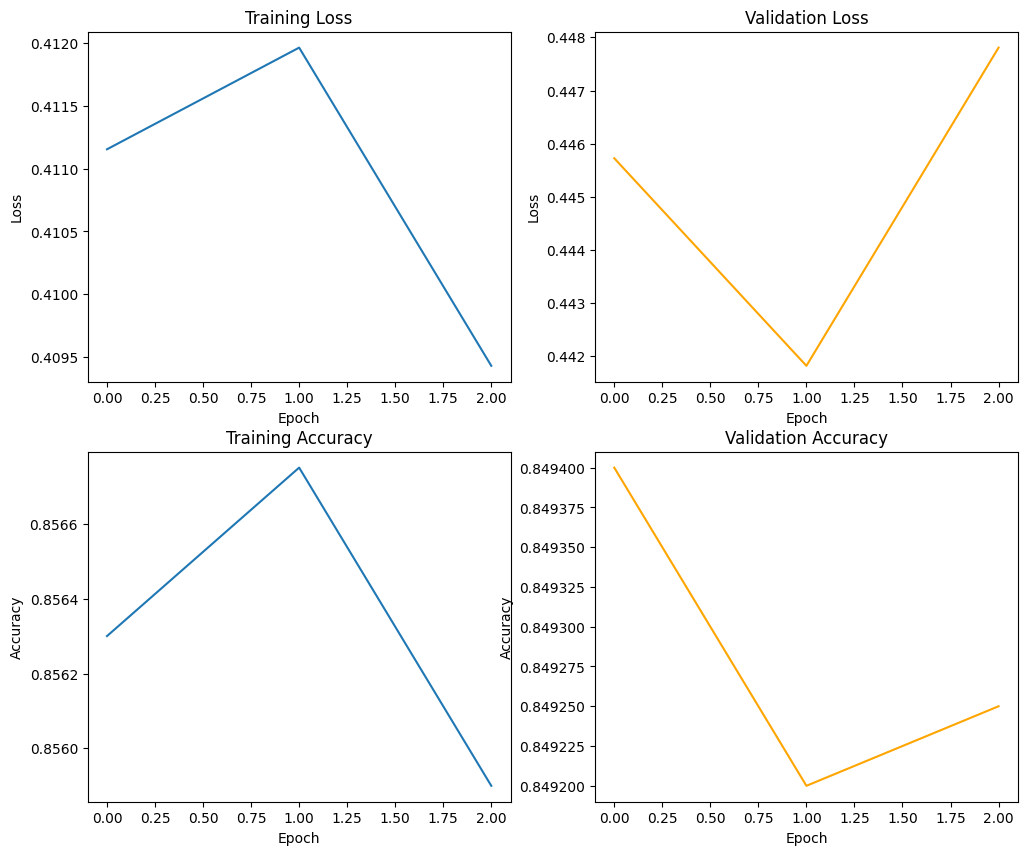

In [11]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

ax[0, 1].plot(val_losses, 'orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

ax[1, 0].plot(train_accuracies)
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

ax[1, 1].plot(val_accuracies, 'orange')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')

plt.show()

### Tuning the hyperparameters

In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, log_loss

C_values = [0.01, 0.1, 1, 10]
solver_values = ['lbfgs', 'saga', 'newton-cg']

best_accuracy = 0
best_params = {}

kf = KFold(n_splits=3, shuffle=True, random_state=42)

X_train_pca = np.load('X_train_pca.npy')
X_test_pca = np.load('X_test_pca.npy')
y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')

for C in C_values:
    for solver in solver_values:
        print(f"Training with C={C}, solver={solver}")
        
        log_reg = LogisticRegression(C=C, solver=solver, max_iter=10000)
        
        train_accuracies = []
        val_accuracies = []
        
        for fold, (train_index, val_index) in enumerate(kf.split(X_train_pca)):
            X_train_fold, X_val_fold = X_train_pca[train_index], X_train_pca[val_index]
            y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

            log_reg.fit(X_train_fold, y_train_fold)

            y_train_pred = log_reg.predict(X_train_fold)
            y_val_pred = log_reg.predict(X_val_fold)

            train_accuracy = accuracy_score(y_train_fold, y_train_pred)
            val_accuracy = accuracy_score(y_val_fold, y_val_pred)

            train_accuracies.append(train_accuracy)
            val_accuracies.append(val_accuracy)
        
        avg_val_accuracy = np.mean(val_accuracies)
        print(f"Average Validation Accuracy: {avg_val_accuracy:.4f}")
        
        if avg_val_accuracy > best_accuracy:
            best_accuracy = avg_val_accuracy
            best_params = {'C': C, 'solver': solver}

Training with C=0.01, solver=lbfgs
Average Validation Accuracy: 0.8464
Training with C=0.01, solver=saga
Average Validation Accuracy: 0.8451
Training with C=0.01, solver=newton-cg
Average Validation Accuracy: 0.8464
Training with C=0.1, solver=lbfgs
Average Validation Accuracy: 0.8487
Training with C=0.1, solver=saga
Average Validation Accuracy: 0.8470
Training with C=0.1, solver=newton-cg
Average Validation Accuracy: 0.8489
Training with C=1, solver=lbfgs
Average Validation Accuracy: 0.8493
Training with C=1, solver=saga
Average Validation Accuracy: 0.8471
Training with C=1, solver=newton-cg
Average Validation Accuracy: 0.8494
Training with C=10, solver=lbfgs
Average Validation Accuracy: 0.8491
Training with C=10, solver=saga
Average Validation Accuracy: 0.8472
Training with C=10, solver=newton-cg
Average Validation Accuracy: 0.8491


In [2]:
print(f"\nBest Validation Accuracy: {best_accuracy:.4f}")
print(f"Best Parameters: {best_params}")


Best Validation Accuracy: 0.8494
Best Parameters: {'C': 1, 'solver': 'newton-cg'}


In [3]:
import pickle

best_log_reg = LogisticRegression(C=best_params['C'], solver=best_params['solver'], max_iter=10000)
best_log_reg.fit(X_train_pca, y_train)

with open("best_log_reg.pkl", "wb") as f:
    pickle.dump(best_log_reg, f)

In [4]:
best_log_reg = pickle.load(open("best_log_reg.pkl", "rb"))
y_test_pred = best_log_reg.predict(X_test_pca)
print(f"Prediction on test set: {y_test_pred}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")

Prediction on test set: [9 2 1 ... 8 1 5]
Test Accuracy: 0.8392


### Evaluation

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

def print_evaluation_table(metrics_dict, conf_matrix=None):
    """
    Function to print a table of evaluation metrics and display the confusion matrix.

    Parameters:
        - metrics_dict (dict): A dictionary containing metric names as keys and metric values as values.
        - conf_matrix (np.ndarray): A confusion matrix.

    Returns:
        None: This function does not return anything. It prints the evaluation table and displays the confusion matrix.
    """
    # Length of the "Metric" and "Score" columns for alignment
    max_metric_len = max(len(metric) for metric in metrics_dict.keys())
    table_width = max_metric_len + 13  # width for the column and the '|' character

    print("Metric Evaluation Table:")
    print("+" + "-" * (table_width) + "+")
    print("| {0:<{width}} |   Score  |".format("Metric", width=max_metric_len))
    print("+" + "-" * (table_width) + "+")

    for metric, score in metrics_dict.items():
        print("| {0:<{width}} | {1:>8.4f} |".format(metric, score, width=max_metric_len))
    print("+" + "-" * (table_width) + "+")

    if conf_matrix is not None:
        plt.figure(figsize=(10, 7))
        sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar = False)
        plt.xlabel("Predicted labels")
        plt.ylabel("True labels")
        plt.title("Confusion Matrix")
        plt.show()

Metric Evaluation Table:
+----------------------+
| Metric    |   Score  |
+----------------------+
| Accuracy  |   0.8392 |
| Precision |   0.8378 |
| Recall    |   0.8392 |
| F1 Score  |   0.8382 |
+----------------------+


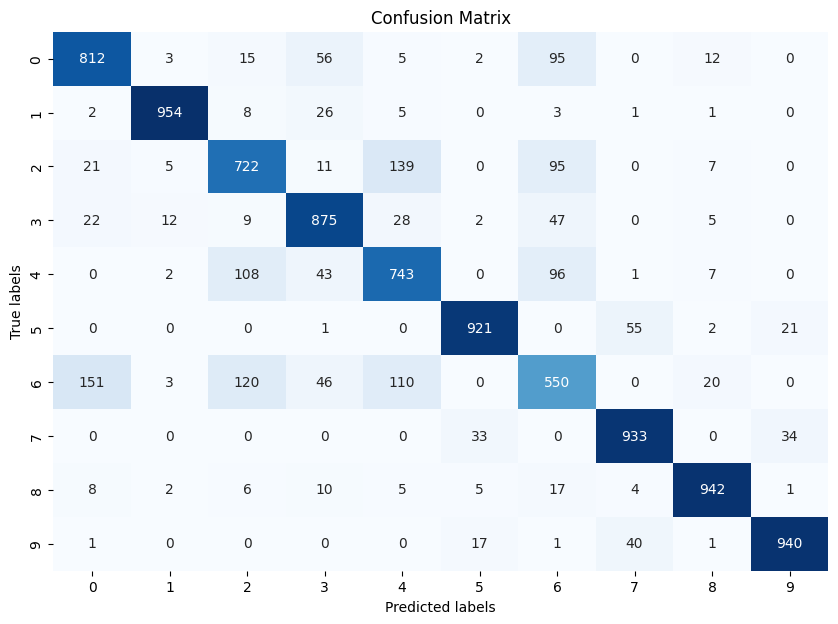

In [39]:
metrics = {
    'Accuracy': accuracy_score(y_test, y_test_pred),
    'Precision': precision_score(y_test, y_test_pred, average='macro'),
    'Recall': recall_score(y_test, y_test_pred, average='macro'),
    'F1 Score': f1_score(y_test, y_test_pred, average='macro')
}

conf_matrix = confusion_matrix(y_test, y_test_pred)

print_evaluation_table(metrics, conf_matrix)

### Visualizing the results with true and predicted labels

In [5]:
wrong_indices = np.where(y_test != y_test_pred)[0]
print(f"Number of misclassified samples: {len(wrong_indices)}")

Number of misclassified samples: 1608


In [15]:
import numpy as np
import matplotlib.pyplot as plt

def plot_wrong_predictions(X_test, y_test, y_test_pred, wrong_indices, N=21):
    """
    Plot wrong predictions in a grid format.

    Parameters:
    - X_test: numpy array of test images.
    - y_test: numpy array of true labels for the test images.
    - y_test_pred: numpy array of predicted labels for the test images.
    - wrong_indices: list or numpy array of indices where predictions were incorrect.
    - N: number of wrong predictions to display (default is 21).
    """
    # Randomly select N wrong indices without replacement
    random_wrong_indices = np.random.choice(wrong_indices, N, replace=False)
    
    # Set figure size and determine number of rows and columns
    plt.figure(figsize=(20, 7))
    n_cols = 7
    n_rows = N // n_cols + 1
    
    # Define class names
    class_names = {
        0: "T-shirt/top",
        1: "Trouser",
        2: "Pullover",
        3: "Dress",
        4: "Coat",
        5: "Sandal",
        6: "Shirt",
        7: "Sneaker",
        8: "Bag",
        9: "Ankle boot",
    }
    
    # Plot each selected wrong prediction
    for row in range(n_rows):
        for col in range(n_cols):
            index = row * n_cols + col
            if index < N:
                plt.subplot(n_rows, n_cols, index + 1)
                img_index = random_wrong_indices[index]
                right_label = y_test[img_index]
                wrong_label = y_test_pred[img_index]
                img = X_test[img_index].reshape(28, 28)
                
                # Display image and add labels
                plt.imshow(img, cmap='gray')
                plt.axis('off')
                plt.text(0.5, -0.15, f"True: {class_names[right_label]}", color='green', ha="center", va="top", transform=plt.gca().transAxes)
                plt.text(0.5, -0.25, f"Pred: {class_names[wrong_label]}", color='red', ha="center", va="top", transform=plt.gca().transAxes)
    
    # Adjust layout and display
    plt.tight_layout()
    plt.show()

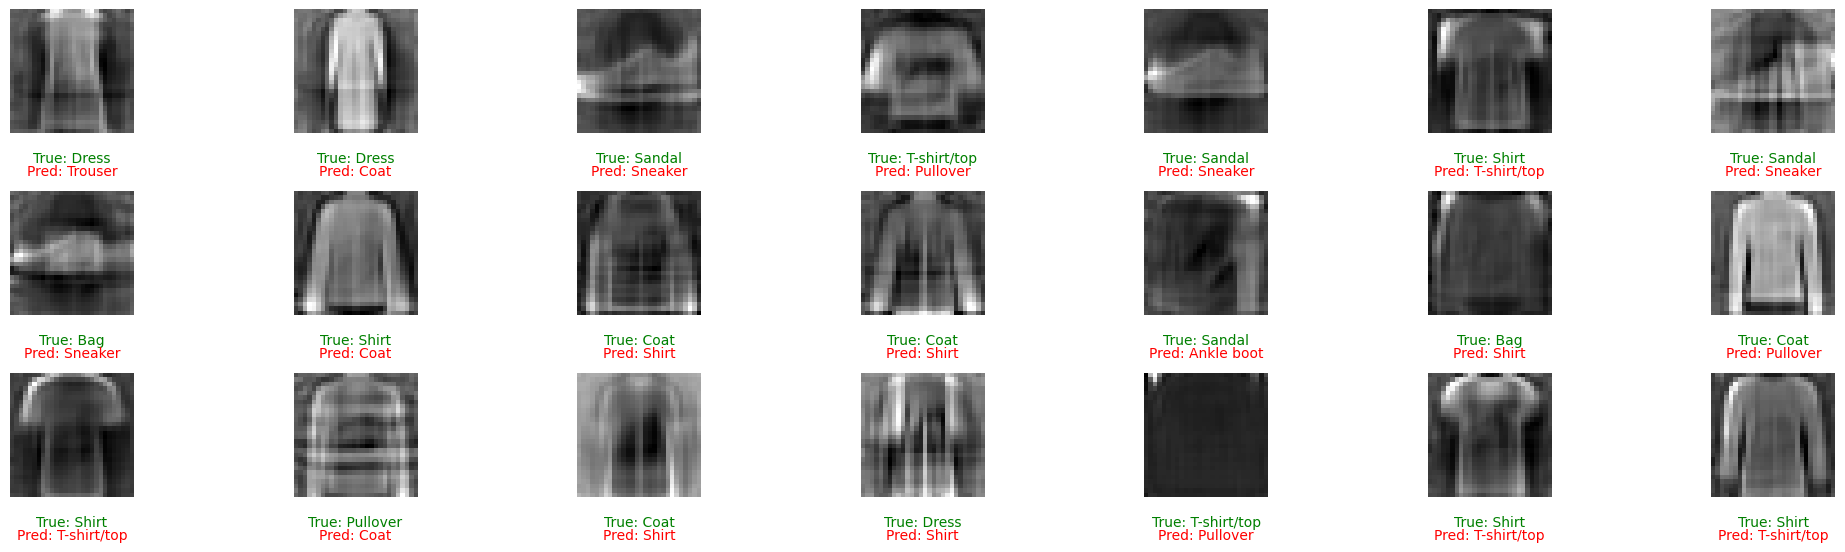

In [16]:
plot_wrong_predictions(X_test_reconstructed, y_test, y_test_pred, wrong_indices, N=21)

## Support Vector Machine

### Experimenting in the Data

In [41]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import KFold

X_train_pca = np.load('X_train_pca.npy')
X_test_pca = np.load('X_test_pca.npy')
y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')

svm = SVC(kernel='rbf', C=1, gamma='scale') # `gamma='scale'` is the default value

kf = KFold(n_splits=3, shuffle=True, random_state=42)

train_accuracies = []
val_accuracies = []

for fold, (train_index, val_index) in enumerate(kf.split(X_train_pca)):
    print(f"Fold {fold + 1}")
    
    X_train_fold, X_val_fold = X_train_pca[train_index], X_train_pca[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    svm.fit(X_train_fold, y_train_fold)
    
    y_train_pred = svm.predict(X_train_fold)
    y_val_pred = svm.predict(X_val_fold)
    
    train_accuracy = accuracy_score(y_train_fold, y_train_pred)
    val_accuracy = accuracy_score(y_val_fold, y_val_pred)
    
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    
    print(f"Train Acc: {train_accuracy:.4f}, Val Acc: {val_accuracy:.4f}")

Fold 1
Train Acc: 0.9015, Val Acc: 0.8834
Fold 2
Train Acc: 0.9012, Val Acc: 0.8815
Fold 3
Train Acc: 0.9012, Val Acc: 0.8805


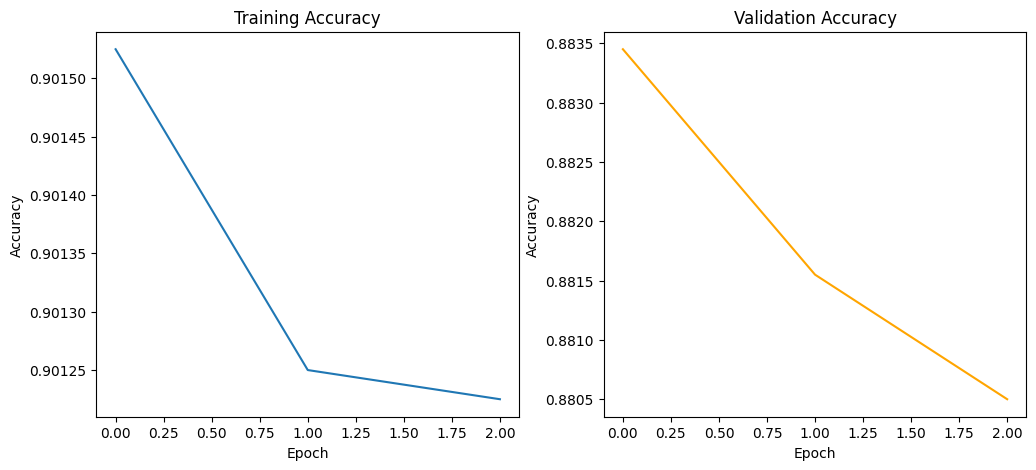

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(train_accuracies)
ax[0].set(xlabel='Epoch', ylabel='Accuracy')
ax[0].set_title('Training Accuracy')

ax[1].plot(val_accuracies, 'orange')
ax[1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1].set_title('Validation Accuracy')

plt.show()

### Tuning the hyperparameters

In [1]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

C_values = [0.01, 0.1, 1, 10]
kernel_values = ['linear', 'poly', 'rbf']

best_accuracy = 0
best_params = {}

kf = KFold(n_splits=3, shuffle=True, random_state=42)

X_train_pca = np.load('X_train_pca.npy')
X_test_pca = np.load('X_test_pca.npy')
y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')

for C in C_values:
    for kernel in kernel_values:
        print(f"Training with C={C}, kernel={kernel}")
        
        svm = SVC(C=C, kernel=kernel, gamma='scale')
        
        train_accuracies = []
        val_accuracies = []
        
        for fold, (train_index, val_index) in enumerate(kf.split(X_train_pca)):
            X_train_fold, X_val_fold = X_train_pca[train_index], X_train_pca[val_index]
            y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

            svm.fit(X_train_fold, y_train_fold)

            y_train_pred = svm.predict(X_train_fold)
            y_val_pred = svm.predict(X_val_fold)

            train_accuracy = accuracy_score(y_train_fold, y_train_pred)
            val_accuracy = accuracy_score(y_val_fold, y_val_pred)

            train_accuracies.append(train_accuracy)
            val_accuracies.append(val_accuracy)
        
        avg_val_accuracy = np.mean(val_accuracies)
        print(f"Average Validation Accuracy: {avg_val_accuracy:.4f}")
        
        if avg_val_accuracy > best_accuracy:
            best_accuracy = avg_val_accuracy
            best_params = {'C': C, 'kernel': kernel}

Training with C=0.01, kernel=linear
Average Validation Accuracy: 0.8582
Training with C=0.01, kernel=poly
Average Validation Accuracy: 0.6883
Training with C=0.01, kernel=rbf
Average Validation Accuracy: 0.7732
Training with C=0.1, kernel=linear
Average Validation Accuracy: 0.8588
Training with C=0.1, kernel=poly
Average Validation Accuracy: 0.8128
Training with C=0.1, kernel=rbf
Average Validation Accuracy: 0.8434
Training with C=1, kernel=linear
Average Validation Accuracy: 0.8588
Training with C=1, kernel=poly
Average Validation Accuracy: 0.8722
Training with C=1, kernel=rbf
Average Validation Accuracy: 0.8818
Training with C=10, kernel=linear
Average Validation Accuracy: 0.8579
Training with C=10, kernel=poly
Average Validation Accuracy: 0.8920
Training with C=10, kernel=rbf
Average Validation Accuracy: 0.8965


In [2]:
print(f"\nBest Validation Accuracy: {best_accuracy:.4f}")
print(f"Best Parameters: {best_params}")


Best Validation Accuracy: 0.8965
Best Parameters: {'C': 10, 'kernel': 'rbf'}


In [3]:
import pickle

best_svm = SVC(C=best_params['C'], kernel=best_params['kernel'], gamma='scale')
best_svm.fit(X_train_pca, y_train)

with open("best_svm.pkl", "wb") as f:
    pickle.dump(best_svm, f)

In [20]:
best_svm = pickle.load(open("best_svm.pkl", "rb"))
y_test_pred = best_svm.predict(X_test_pca)
print(f"Prediction on test set: {y_test_pred}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")

Prediction on test set: [9 2 1 ... 8 1 5]
Test Accuracy: 0.8923


### Evaluation

Metric Evaluation Table:
+----------------------+
| Metric    |   Score  |
+----------------------+
| Accuracy  |   0.8923 |
| Precision |   0.8919 |
| Recall    |   0.8923 |
| F1 Score  |   0.8920 |
+----------------------+


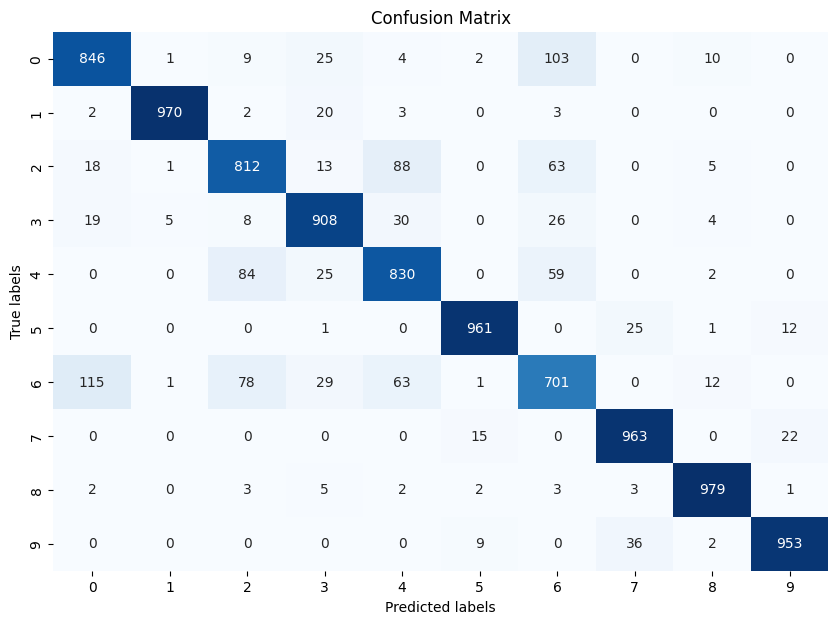

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

metrics = {
    'Accuracy': accuracy_score(y_test, y_test_pred),
    'Precision': precision_score(y_test, y_test_pred, average='macro'),
    'Recall': recall_score(y_test, y_test_pred, average='macro'),
    'F1 Score': f1_score(y_test, y_test_pred, average='macro')
}

conf_matrix = confusion_matrix(y_test, y_test_pred)

print_evaluation_table(metrics, conf_matrix)

### Visualizing the results with true and predicted labels

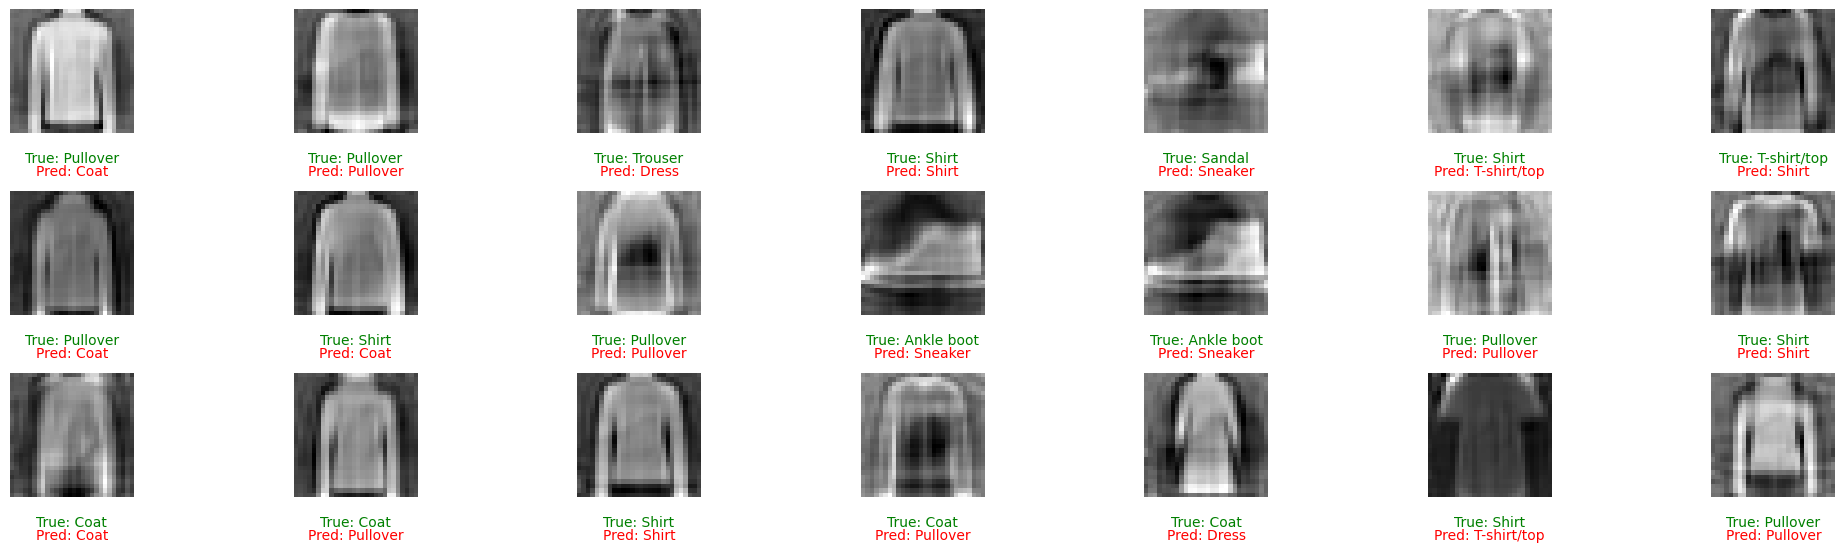

In [18]:
plot_wrong_predictions(X_test_reconstructed, y_test, y_test_pred, wrong_indices, N=21)

# Compare the performance of the models for the original and reduced dimensionality data

## Logistic Regression

### Before Dimensionality Reduction

The logistic regression model applied to the dataset before PCA achieved:

- Accuracy, Precision, Recall, and F1 Score of about $0.85$.
- The confusion matrix shows that certain classes, such as Shirt and Coat, are frequently misclassified, indicating that these categories might have similar features that the model struggles to distinguish without dimensionality reduction.
- The misclassification images also highlight that the model sometimes confuses classes with visually similar outlines or textures (e.g., Coat as Shirt or Pullover), likely due to overlapping feature spaces.

### After Dimensionality Reduction

With PCA applied, the logistic regression model shows:

- Slightly lower accuracy ($\approx 0.839$), along with minor drops in precision and F1 score. However, the scores remain consistent, showing that dimensionality reduction did not severely impact model performance.
- The confusion matrix still displays misclassifications, but PCA has preserved the essential features for most classes, allowing the model to make similar predictions with reduced data dimensionality.
- The misclassified images after PCA reflect similar patterns of confusion as before PCA, but the model’s performance is more efficient due to lower complexity.

### Conclusion

- **Performance Consistency**: The model’s accuracy, precision, recall, and F1 score remain close to the original values after applying PCA with `100` components, indicating that PCA successfully retains the essential features for classification.
- **Efficiency**: The model with PCA is computationally more efficient, processing fewer dimensions without significant loss in classification performance. This makes PCA a valuable step, especially for large datasets where dimensionality reduction can speed up training and inference times.
- **Error Patterns**: The same classes (like Shirt and Coat) are often misclassified both before and after PCA, suggesting that these classes have overlapping features that logistic regression alone struggles to separate. Addressing this might require feature engineering or a more advanced model to better capture subtle differences.

In summary, applying PCA with `100` components allows the model to work more efficiently while maintaining similar accuracy, making it a practical choice for reducing dimensionality in this context.

## Support Vector Machine

### Before Dimensionality Reduction

- Best Validation Accuracy: $0.90275$.
- Overall Metrics: Accuracy of $0.8995$, Precision of $0.8993$, Recall of $0.8995$, and F1 Score of $0.8993$.
- Confusion Matrix Insights: The performance across classes is more consistent, with fewer misclassifications compared to the PCA-reduced model. The lack of PCA allows the model to utilize the full feature set, which may help it capture more detailed variations within each class. This results in higher accuracy, precision, recall, and F1 scores, indicating better classification ability.

### After Dimensionality Reduction

- Best Validation Accuracy: $0.8965$.
- Test Accuracy: $0.8923$.
- Overall Metrics: Accuracy of $0.8923$, Precision of $0.8919$, Recall of $0.8923$, and F1 Score of $0.8920$.
- Confusion Matrix Insights: The model performs reasonably well across most classes. However, certain classes still show misclassifications, especially where visual similarity between classes might be high. For example, items like Shirt and Coat are frequently confused, which might indicate that the reduced feature set with PCA still captures relevant details but may lose some finer distinctions.

### Conclusion

- **Performance Difference**: The SVM model without PCA has slightly better performance across all metrics. This suggests that while PCA effectively reduces dimensionality, the full feature set provides additional details, leading to marginally higher classification accuracy.

- **Efficiency vs. Accuracy**: Using PCA reduces computational load, which is advantageous for large datasets. However, there’s a slight trade-off in accuracy. For tasks requiring high precision, the non-PCA model is preferable, despite the higher computational demand.

- **Class-Specific Misclassifications**: Both models show similar patterns in misclassifying visually alike classes, indicating that additional feature engineering or a more complex model may help improve separation between these classes.

In summary, the PCA-reduced SVM model offers computational efficiency with strong accuracy, while the non-PCA model provides superior accuracy and might be better suited for applications where computational resources aren’t a constraint.

## Reflect on the trade-offs between dimensionality reduction and model performance

Dimensionality reduction techniques, like PCA, are often employed to simplify data, especially in high-dimensional spaces. However, reducing dimensions can lead to both advantages and trade-offs that affect model performance. Here’s a reflection on these trade-offs as seen with logistic regression and SVM.

### Model Efficiency and Computational Cost

- **With Dimensionality Reduction (PCA)**: By reducing the number of features, models require less computational power and memory, leading to faster training and inference times. This is especially beneficial for computationally intensive algorithms like SVM, where the time complexity increases with the feature count.
- **Without Dimensionality Reduction**: Although more computational resources are required, models can fully utilize all available information, which can lead to more nuanced and accurate representations of the data. For logistic regression, the impact may be less significant since it's inherently faster, but for SVM, avoiding dimensionality reduction can noticeably increase processing time.

### Impact on Accuracy and Predictive Performance

- **With Dimensionality Reduction**: PCA helps retain the most informative features, allowing models to perform well with less data "noise" and fewer irrelevant features. However, it may lose finer distinctions within the data, particularly if complex relationships between features are not fully preserved in lower-dimensional space. This can result in a slight drop in accuracy, as seen with both logistic regression and SVM in the PCA-reduced versions.
- **Without Dimensionality Reduction**: Models generally achieve better accuracy and precision without PCA since they can leverage all the data's intricacies. In both logistic regression and SVM, using the full feature set led to marginally higher accuracy, indicating that some critical information was lost during PCA. This may be particularly important for complex classes with subtle differences, where maintaining high dimensionality helps the model differentiate effectively.

### Summary of Trade-offs

| Aspect      | With Dimensionality Reduction (PCA)                          | Without Dimensionality Reduction                      |
|-------------|--------------------------------------------------------------|-------------------------------------------------------|
| **Efficiency** | Faster training and inference, especially for SVM            | Higher computational cost, slower with SVM            |
| **Accuracy**   | Slightly reduced accuracy due to loss of information         | Generally higher accuracy, retains all feature nuances |

### Conclusion

For both logistic regression and SVM, dimensionality reduction with PCA offers computational efficiency, making it valuable for high-dimensional data. However, there is a trade-off in accuracy, as some critical information may be lost, impacting the model's ability to capture subtle class distinctions. Without dimensionality reduction, both models perform better in terms of accuracy but at the cost of increased computation and potential overfitting.

In practice, the choice depends on the specific requirements: if computational resources and time are limited, or if the data is highly dimensional with potential redundancy, PCA can offer a balanced approach. However, when high accuracy and interpretability are prioritized, and resources permit, avoiding dimensionality reduction may be beneficial.